
# TENSORFLOW TUTORIAL:



## Introduction

If you are a data science and machine learning enthusiast, you must have already stumbled upon neural networks and deep learning. They have now become an integral part of modelling and the analysis aspect of the data science pipeline. A lot of advancements are happening in this field and thus it is quite exciting to dive deep into this topic. But if you haven't started you journey yet, this tutorial is a perfect start point. The tutorial introduces TensorFlow, which is a machine learning library to build models in a distributed environment. After reading this tutorial, you will be able to create your own machine learning models (primarily neural networks since TensorFlow is more suited for deep learning applications) using TensorFlow to solve a real-world problem. The tutorial assumes that the reader has some prior knowledge about neural nets and programming in python.


## Tutorial content

In this tutorial, we will discuss how to use TensorFlow for building models and get ourselves familiar with the TensorFlow environment, it's classes and methods.

We will cover the following topics in this tutorial:
- [TensorFlow](#TensorFlow)
- [Installation](#Installing-the-libraries)
- [API Components](#API-Components)
- [Estimators](#Estimators)
- [Tensors](#Tensors)
- [Graphs](#Graphs)
- [Sessions](#Sessions)
- [Program Flow](#Program-Flow)
- [Losses and Optimizers](#Losses-and-Optimizers)
- [Neural Network Example](#Neural-Network-Example)
- [Save and Restore](#Save-and-Restore)
- [Limitations](#Limitations)
- [Conclusion](#Conclusion)
- [References](#References)

## TensorFlow

TensorFlow is Google's open source software library for doing efficient numerical computation through data flow graphs and is very well suited for deep learning applications. However, basic models like Linear Regression, Logistic Regression, Nearest Neighbours, etc. can also be implemented using TensorFlow.  TensorFlow is supported to run on both CPUs and GPU. This is so because often deep neural networks take a lot of training time, as we must train the model against massive datasets involving a lot of matrix multiplication to achieve a desired level of accuracy. This becomes a bottleneck in many scenarios and thus running them on GPUs is faster. 

[<img src="tf_image.png">](http://quintagroup.com/cms/python/images/tensorflow-logo.png/image_view_fullscreen)

## Installing the libraries

Now based on the architecture of the computer, one can either download the GPU or CPU version. For this tutorial, we will stick to the installation of a CPU version on a windows machine. TensorFlow supports Python 3.5.x and 3.6.x versions. If you’re machine doesn’t have one of them, please install it now. Now to install TensorFlow, start a terminal and type the following command:

    $ pip3 install --upgrade tensorflow
    
If you’re planning to install via Anaconda, you must first create a virtual environment separate from where your Python Libraries are installed. This approach is unofficial but supported by the community. 

    $ conda create -n tensorflow pip python=3.5 
    
Next, we need to activate our virtual environment and install TensorFlow in that environment as follows:

    $ activate tensorflow
    
    $ pip install --ignore-installed --upgrade tensorflow

Now, to check if it has been installed successfully or not, run the below code snippet:


In [1]:
import tensorflow as tf
ready = tf.constant('You are ready to use TensorFlow!')
init_sess = tf.Session()
print(init_sess.run(ready))

b'You are ready to use TensorFlow!'


## API Components

Before we dive deep into understanding how to use TensorFlow, let us first understand the TensorFlow environment and what built-in functionalities it provides us with. TensorFlow provides a lot of programming APIs ranging from high-level APIs like Estimators, Datasets to low level-level APIs like Python, C++, Java, Go. The high-level APIs are present to simplify and automate the processes. Estimators are a representative of the complete model and are aimed at encapsulating training, evaluation and prediction aspects of the model. Let us talk more about estimators.

<img src="tf_api.png">

## Estimators

Estimators as mentioned above are high-level APIs that makes our work easy. TensorFlow comes handy with various built-in estimators which are termed as ‘pre-made estimators’. They all belong to the tf.estimator.Estimator class in TensorFlow. A few of the examples of pre-made estimator include DNNClassifier, DNNRegressor, LinearClassifier, etc. Apart from using pre-made estimators, you can custom create your estimators by instantiating the tf.estimator.Estimator class. However, we will not discuss much about creating your own estimator, as this out of the scope for this tutorial.  These pre-made estimators do everything for us and we do not have to bother about the creating the computational graphs and sessions for training our model. The workflow of any TensorFlow program will be discussed in subsequent section. 

It is good that we have readily available Estimators but knowing the Core features of the TensorFlow library is important in developing and understanding the art of building complex machine learning applications. As mentioned earlier, a TensorFlow program at the backend builds a computational graph to run the program. This graph contains series of operations to be performed on the graphical nodes. The main idea of implementing a low-level API is build the computational graph right from scratch. Now, each node of the graph can comprise of one or many tensors. Let us understand what tensor are in TensorFlow.


## Tensors

Everything in TensorFlow is processed as Tensors. They are the basic building blocks of the computation graphs. These tensors store data in any number of dimensions and are analogous to n-dimensional NumPy arrays.  Tensors are basically high dimensional vectors or matrices, which forms the basis for any machine learning algorithm. A tensor object has two properties: a data type which can be int32, foat32, etc. and shape of that tensor. Tensors are of various types and let us see the three basic ones which will help us in building our models


### Constants

Constants are like final fields in java. They are immutable, which once declared cannot be changed. They can be nodes without any inputs and outputting a value that they store internally.


In [2]:
# Examples to define a constant:
constant1 = tf.constant(2.0, name = 'const1')
constant2 = tf.constant([1., 2., 3., 4.], name='const2')

print("My Constant 1:", constant1, '\n')
print("My Constant 2:", constant2)

My Constant 1: Tensor("const1:0", shape=(), dtype=float32) 

My Constant 2: Tensor("const2:0", shape=(4,), dtype=float32)


### Placeholders

Placeholders are the type of tensors that will store data from external sources. Let’ say that we don not know before hand what data we are expecting to store in the variables, but at a later stage we want the tensors to take care of it. It just like a promise we make that we will provide you with data, but do not know at this stage. Thus, we just define the structure or rather a place to hold the data and the type of data since we do not provide any initialization for the placeholder’s declaration.


In [3]:
#Examples to define placeholders:
placeholder1 = tf.placeholder(tf.float32, [None, 1], name='phold_one')
placeholder2 = tf.placeholder("float", name = 'phold_two')

print("Placeholder 1:", placeholder1, '\n')
# the shape has a question mark since we do want to be cagey about how much data can be stored in our tensor.
# all we know is that, it is going to be a 1-dimensional vector or rather tensor
print("Placeholder 2:", placeholder2)

Placeholder 1: Tensor("phold_one:0", shape=(?, 1), dtype=float32) 

Placeholder 2: Tensor("phold_two:0", dtype=float32)


### Variables

Variables are the only mutable tensors whose values can be changed during the duration of a graph in TensorFlow. In machine learning applications, in particular neural networks, we generally want to initialise variables for weights, output of hidden layers and biases.


In [4]:
#Examples to define variables:

# different ways of creating and initializing variables

variable1 = tf.get_variable("my_variable_one", [1, 2, 3], dtype=tf.int32, initializer=tf.zeros_initializer)
variable2 = tf.Variable(2.0, name = "my_variable_two")
variable3 = tf.get_variable("my_variable_three", dtype=tf.int32, initializer=tf.constant([10, 20]))

print("Variable 1: ",variable1, '\n')
print("Variable 2:", variable2, '\n')
print("Variable 3:", variable3)

# the first creates a variable named 'my_variable_one'  as athree-dimensional tesnor having shape [1,2,3]
# the second statement is similar to constant and placeholder initialization
# in the third statement, we do not specify the shape, as the shape of the initializer will be used 
# and we do not have to explicitly specify it. 

Variable 1:  <tf.Variable 'my_variable_one:0' shape=(1, 2, 3) dtype=int32_ref> 

Variable 2: <tf.Variable 'my_variable_two:0' shape=() dtype=float32_ref> 

Variable 3: <tf.Variable 'my_variable_three:0' shape=(2,) dtype=int32_ref>


We can also create collections of variables, as many separate sessions or part of the TensorFlow code will create variables differently and we would want to have a common way of accessing it. By default, when we create variables, they are placed in these two collections: tf.GraphKeys.GLOBAL_VARIABLES and tf.GraphKeys.TRAINABLE_VARIABLES. But if you do not the variables to be trainable, we can set the 'trainable' parameter as 'false'. See the commands below:

In [5]:
#collections

local1 = tf.get_variable("my_local_variable_one", shape=(), collections =[tf.GraphKeys.LOCAL_VARIABLES])
print("Local variable: ", local1, '\n')

#alternatively
local2 = tf.get_variable("my_local_variable_two", [1,2,3,4], trainable = False)
print("Alternatively")
print(local2, '\n')

#You can add these variables to previously created collections and retrieve them using the following commands:
tf.add_to_collection("new_collection", local1)
tf.add_to_collection("new_collection", local2)

#retrieve
my_collections = tf.get_collection("new_collection")
print("This is my collection:" , my_collections)

Local variable:  <tf.Variable 'my_local_variable_one:0' shape=() dtype=float32_ref> 

Alternatively
<tf.Variable 'my_local_variable_two:0' shape=(1, 2, 3, 4) dtype=float32_ref> 

This is my collection: [<tf.Variable 'my_local_variable_one:0' shape=() dtype=float32_ref>, <tf.Variable 'my_local_variable_two:0' shape=(1, 2, 3, 4) dtype=float32_ref>]


In [6]:
# When working with low-level APIs you need to explicitly initialize them before you can use them. 
# They can be done as follows: 

#initialize variables

init1 = tf.global_variables_initializer()

#alternative, we can also write:
# init = tf.initialize_all_variables()
# However, writing it this way is not recommended

#initialize individual variables use 'variable_name.initializer'

get_uninitialized = tf.report_uninitialized_variables()

## Graphs

Throughout this tutorial we’ve talked about how TensorFlow is all about dataflow graph. We define our graph and create a session which runs parts of the TensorFlow graph on different machines in a distributed fashion. Dataflow graphs are a common paradigm for parallel computing. We represent the nodes as the computational units and the edges as the representing the flow of data. For example, an add operation would correspond to a node with two incoming edges representing the two elements to be added and one outgoing edge representing the output.

<img src="tensors_flowing-3.gif">

## Sessions

While training a model in TensorFlow, the graph should run in a session. Each session has its physical resources on the program in a session is supposed to run. We first create and initialize the tf.Session object using with operation and then run the run for training the model. Let us create some simple operations to be run in a session to understand sessions:

In [7]:
#create variables
x = tf.Variable(2.0, name='x')
y = tf.Variable(3.0, name='y')

#create operations
x_square = tf.square(x, name='x_square')
y_square = tf.square(y, name='y_square')
mult = tf.multiply(x,y, name='multiply')
add = tf.add(x_square, y_square, name='add')
subt = tf.subtract(add, mult, name='subt')

#setup initialization of variables
init_op = tf.global_variables_initializer()

# start the session
with tf.Session() as sess:
    # initialise the variables
    sess.run(init_op)
    # compute the output of the graph
    out = sess.run(subt)
    # Note:
    # thr run method also takes feeds as input 
    # feeds is a dictionary which substitutes tensor objects with values during the execution of the program
    print("Variable output is {}".format(out))

Variable output is 7.0


## Program Flow

So far, we’ve discussed each of the terminologies in TensorFlow individually. Let us now put everything together and understand the complete flow of the program. The following is the workflow of a TensorFlow program:
1.	We first build the computational graph defining the operations
2.	We create, initialize and compile all the variables defined
3.	We create a session wherein our computational graph can be run
4.	Model training happens in the session during the execution of the compiled graph
5.	Once we’re done with training, we close the session and free all the allocated resources
Let us see the entire flow putting all the pieces together and build a simple linear regression model in TensorFlow. 


Epoch: 0100 cost= 0.129281968 W= 0.24567033 b= 0.6915515
Epoch: 0200 cost= 0.128382444 W= 0.24023163 b= 0.732614
Epoch: 0300 cost= 0.128214493 W= 0.23905449 b= 0.7415014
Epoch: 0400 cost= 0.128179386 W= 0.23879972 b= 0.743425
Epoch: 0500 cost= 0.128171891 W= 0.23874472 b= 0.74384016
Epoch: 0600 cost= 0.128170177 W= 0.23873268 b= 0.7439313
Epoch: 0700 cost= 0.128169864 W= 0.23873024 b= 0.74394965
Epoch: 0800 cost= 0.128169701 W= 0.238729 b= 0.74395907
Epoch: 0900 cost= 0.128169701 W= 0.238729 b= 0.74395907
Epoch: 1000 cost= 0.128169701 W= 0.238729 b= 0.74395907
Optimization Finished!
Training cost= 0.1281697 W= 0.238729 b= 0.74395907 



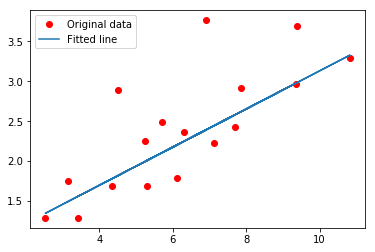

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
learning_rate = 0.125
training_epochs = 1000
display_step = 100

# Training Data
X_train = np.asarray([3.15,4.5,5.25,6.91,6.12,4.35,9.375,6.295,7.68,2.527,
                         7.128,10.821,5.287,7.863,5.712,9.356,3.412])
Y_train = np.asarray([1.75,2.89,2.25,3.765,1.789,1.685,3.698,2.363,2.425,1.289,
                         2.225,3.296,1.685,2.92,2.496,2.9678,1.291])
sample_size = X_train.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")


# Construct a linear model
model_prediction = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.square(model_prediction-Y))/(2*sample_size)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(X_train, Y_train):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: X_train, Y:Y_train})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: X_train, Y: Y_train})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    #Graphic display
    plt.plot(X_train, Y_train,'ro', label='Original data')
    plt.plot(X_train, sess.run(W) * X_train + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

We’ve seen how the line fits our pre-generated random data. But, however, we’ve encountered a few terms which we haven’t talked about like cost, optimizer, etc. Let us discuss these terminologies. (Please feel free to skip the below section if you’re familiar with the terms)


## Losses and Optimizers

Loss function is the incorrectness of the model or how off our prediction is from its true value. Various loss functions have been defined depending upon the use case in hand. In TensorFlow, we have classes implementing these loss functions and by default they are added to the GraphKeys.LOSSES collection. One such example of loss is cross entropy loss. 

Mathematically:
<img src = "cr.PNG" >

Where: m is the number of training examples

	N is the number of class labels
    
	Y is the output for the jth node of the ith trainng example
    
	Y_ is the predicted output of the jth node for the ith training example.

The underlying implementation of this in TensorFlow is as follows:


In [ ]:
#Note:
# Define your y_pred and y before using this command
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_pred)
                         + (1 - y) * tf.log(1 - y_pred), axis=1))

Next, we specify our optimizer, which helps us to reduce this loss. Depending upon the use case we choose our optimizer and a learning rate at which we want the model to learn and correct its mistakes. The Linear Model example used gradient descent, which uses backpropagation to converge to an optimal solution. TensorFlow has a library containing major training optimizers used in neural networks, which can be found [here](https://www.tensorflow.org/api_guides/python/train) and for losses found [here](https://www.tensorflow.org/api_docs/python/tf/losses)

## Neural Network Example

We know that neural nets have a wide range of applications ranging from speech recognition, image classification, text generation, etc. TensorFlow library is specialized in developing these neural nets efficiently and with ease. We have a lot of readily available classes and built-in functions for training out model. Neural nets represent a function which we want to learn as a network of computational units which might contain millions of trained parameters. The steps involved in training a neural net are:
1.	Firstly, we choose a loss function which we want to optimize. This can be expressed as sum of squared errors, as maximum conditional likelihood, as maximum a posterior estimate, etc.
2.	Secondly, we design our network architecture which comprises of network units like ReLU, sigmoid, convolutions, tanh, etc. Then we determine the width of our layers and whether they are partially or fully connected
3.	Lastly, we decide our training algorithm deriving the gradient formula and choosing an appropriate gradient descent method and also decide upon the stopping condition. 
We keep doing this iteratively, experimenting with the architecture and fine tuning the hyperparameters until we get the best results. Now let us replicate this in TensorFlow:


In [27]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# we plan to use the standard MNIST dataset for our demonstration purposes
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

# deciding on the number of hidden units
total_nodes_hl1 = 500
total_nodes_hl2 = 500

# number of pre-determined classes
total_classes = 10
batch_size = 100


# defining placeholders
x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float')

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [28]:
# designing the neural net architecture
def neural_network_model(data):
    hidden_layer_1 = {'weights':tf.Variable(tf.random_normal([784, total_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([total_nodes_hl1]))}

    hidden_layer_2 = {'weights':tf.Variable(tf.random_normal([total_nodes_hl1, total_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([total_nodes_hl2]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([total_nodes_hl2, total_classes])),
                    'biases':tf.Variable(tf.random_normal([total_classes])),}


    l1 = tf.add(tf.matmul(data,hidden_layer_1['weights']), hidden_layer_1['biases'])
    layer_1 = tf.nn.sigmoid(l1)

    l2 = tf.add(tf.matmul(layer_1,hidden_layer_2['weights']), hidden_layer_2['biases'])
    layer_2 = tf.nn.relu(l2)

    output = tf.matmul(layer_2,output_layer['weights']) + output_layer['biases']

    return output


In [29]:
prediction_nn = neural_network_model(x)

In [30]:
# Training the neural network
def train_neural_network(x, prediction, hm_epochs = 1):

    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        # Restore model weights from previously saved model
        # UNCOMMENT BELOW LINE IF YOU WANT TO LOAD A SAVED MODEL
        load_path = saver.restore(sess, model_path)

        for epoch in range(hm_epochs):
            avg_cost = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                # UNCOMMENT THIS FOR TRAINING RNN
#                 epoch_x = epoch_x.reshape((batch_size,n_units,unit_size))
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                avg_cost += c

            print('Epoch', epoch+1, 'completed out of',hm_epochs,'loss:',avg_cost)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))
        
        #UNCOMMENT BELOW IF YOU WANT TO SAVE THE MODEL
        
        # Save model weights to disk
        save_path = saver.save(sess, model_path)
        print("Model saved in file: %s" % save_path)

# UNCOMMENT BELOW LINE WHILE RUNNING RNN
#         print('Accuracy:',accuracy.eval({x:mnist.test.images.reshape((-1, n_units, unit_size)), y:mnist.test.labels}))

In [13]:
# start training the model and get the accuracy of the model
train_neural_network(x, prediction_nn,3)

Epoch 1 completed out of 3 loss: 15320.214398622513
Epoch 2 completed out of 3 loss: 3979.937641978264
Epoch 3 completed out of 3 loss: 2370.055524110794
Accuracy: 0.9127


In [14]:
# Similarly we can design sequencial neural nets as follows:

from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib import rnn
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

hm_epochs = 1
total_classes = 10
batch_size = 128
unit_size = 28
n_units = 28
rnn_size = 128


x = tf.placeholder('float', [None, n_units,unit_size])
y = tf.placeholder('float',[None, total_classes])

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [15]:
# defining your RNN
def recurrent_neural_network(x):
    layer = {'weights':tf.Variable(tf.random_normal([rnn_size,total_classes])),
             'biases':tf.Variable(tf.random_normal([total_classes]))}

    x = tf.transpose(x, [1,0,2])
    x = tf.reshape(x, [-1, unit_size])
    x = tf.split(x, n_units, 0)

    lstm_cell = rnn.BasicLSTMCell(rnn_size,state_is_tuple=True)
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

    output = tf.matmul(outputs[-1],layer['weights']) + layer['biases']

    return output

In [17]:
# Model output
prediction_rnn = recurrent_neural_network(x)

# start training your RNN
train_neural_network(x, prediction_rnn,7)

Epoch 1 completed out of 7 loss: 194.0784340724349
Epoch 2 completed out of 7 loss: 56.50654832087457
Epoch 3 completed out of 7 loss: 39.62241821363568
Epoch 4 completed out of 7 loss: 29.30630011856556
Epoch 5 completed out of 7 loss: 24.340168490074575
Epoch 6 completed out of 7 loss: 20.931029825937003
Epoch 7 completed out of 7 loss: 18.009069211315364
Accuracy: 0.9813


## Save and Restore

We all know that training the model takes up a lot of resources and time. Now, we would want to overcome this issue, by saving our model and being able to restore it in the future for further training. Thus, in TensorFlow, the tf.train.Saver class provides methods to save and restore models. It adds save and restore operations to the graph for all or a list of parameters that have been passed. Let’s see how this can be done in TensorFlow:

In [25]:
# define the path where you want to store the model
model_path = "/tmp/model.ckpt"
# 'Saver' op to save and restore all the variables
saver = tf.train.Saver()


In [26]:
print("Starting the 1st run of training the model...")
train_neural_network(x, prediction_nn)

Starting the 1st run of training the model...
Epoch 1 completed out of 1 loss: 13694.817237138748
Accuracy: 0.8716
Model saved in file: /tmp/model.ckpt


In [31]:
# Running a new session
print("Starting the 2nd run of training the model...")

# print("Model restored from file: %s" % save_path)
train_neural_network(x, prediction_nn, 10)

Starting the 2nd run of training the model...
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Epoch 1 completed out of 10 loss: 16679.21664237976
Epoch 2 completed out of 10 loss: 4177.576410770416
Epoch 3 completed out of 10 loss: 2494.067486070795
Epoch 4 completed out of 10 loss: 1605.5410353541374
Epoch 5 completed out of 10 loss: 1073.2675522095396
Epoch 6 completed out of 10 loss: 737.434275756443
Epoch 7 completed out of 10 loss: 487.58215398768147
Epoch 8 completed out of 10 loss: 345.54974446637124
Epoch 9 completed out of 10 loss: 250.09764612251487
Epoch 10 completed out of 10 loss: 162.28058818298797
Accuracy: 0.9357
Model saved in file: /tmp/model.ckpt


## Limitations

Although, we seen what all we can do using TensorFlow, but however, there are a few caveats to it as mentioned below:
1.	It is still in its nascent stages and significant development are being made to the library.
2.	It is very much dependent upon the underlying hardware used to train the model.
3.	It is best suitable for deep learning applications and can complicate things for simple applications or models wherein scikit-learn might suffice our purpose
4.	It only has APIs for a few languages excluding R, Ruby, etc.
5.	It is at a much lower level compared to Keras which is more abstract and built on top of TensorFlow, which makes model training more intuitive. 


## Conclusion

Thus, we have seen in this tutorial, how TensorFlow is a machine learning library specialized for deep learning application. It builds these models through computational graphs and we can design our own neural network architecture for solving any real-life problem. It allows distributed processing while training the model which is not provided by other machine learning libraries out there. TensorFlow has been around for approximately 4 years along with other libraries like Theano, Torch, etc. and has its own community being built. 

## References

This tutorial was just a high-level introduction of how we can use TensorFlow. It was kept simple keeping in mind the readers are completely unfamiliar with TensorFlow. I have used the following links to convey my idead and the readers can also refer them to get much deeper understanding.
Links:
1. TensorFlow Official Documentation: https://www.tensorflow.org/
2. Linear Model: https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/linear_regression.py
3. Introduction to TensorFlow: https://www.analyticsvidhya.com/blog/2016/10/an-introduction-to-implementing-neural-networks-using-tensorflow/
4. Model building: https://pythonprogramming.net/rnn-tensorflow-python-machine-learning-tutorial/